In [62]:
%matplotlib inline
import matplotlib as mpl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import api_import 
import simplejson as json

In [63]:
yelp = pd.read_json("../data/yelp/yelp_api_data.json")
with open("../data/yelp/yelp_api_data.json") as fp:
    json1_str = fp.read() 
    yelp = json.loads(json1_str)
cuisine_types = yelp.keys()

In [64]:
cuisine_types

['cafes',
 'mexican',
 'chinese',
 'peruvian',
 'ethiopian',
 'japanese',
 'tradamerican',
 'spanish',
 'newamerican',
 'puertorican',
 'soup',
 'arabian',
 'brazilian',
 'korean',
 'colombian',
 'pizza',
 'latin',
 'french',
 'diners',
 'turkish',
 'cuban',
 'seafood',
 'indpak',
 'vegan',
 'greek',
 'mideastern',
 'vegetarian',
 'italian']

In [65]:
food_dict = {"puertorico": "puertorican",
"puertorican": "puertorican",
"cuba": "cuban",
"cuban": "cuban",
"latin" : "latin",
"latino": "latin",
"mexican": "mexican",
"mex": "mexican",
"mexico": "mexican",
"chinese": "chinese",
"china": "chinese",
"veggie": "vegetarian",
"vegetarian": "vegetarian",
"indian": "indpak",
"india": "indpak",
"japan": "japanese",
"japanese": "japanese",
"greek": "greek",
"american": "tradamerican",
"modern": "newamerican",
"italy": "italian",
"italian": "italian"
}

In [66]:
food_dict

{'american': 'tradamerican',
 'china': 'chinese',
 'chinese': 'chinese',
 'cuba': 'cuban',
 'cuban': 'cuban',
 'greek': 'greek',
 'india': 'indpak',
 'indian': 'indpak',
 'italian': 'italian',
 'italy': 'italian',
 'japan': 'japanese',
 'japanese': 'japanese',
 'latin': 'latin',
 'latino': 'latin',
 'mex': 'mexican',
 'mexican': 'mexican',
 'mexico': 'mexican',
 'modern': 'newamerican',
 'puertorican': 'puertorican',
 'puertorico': 'puertorican',
 'vegetarian': 'vegetarian',
 'veggie': 'vegetarian'}

In [129]:
#Load master dataframe
df = pd.read_json("../data/underserved_time_data.json")
df.head(8)

,1998,2001,2002,2004,2007,2010,2012,ALAND,ALAND_SQMI,AWATER,...,unweighed_average_rating_restaurants_puertorican,unweighed_average_rating_restaurants_seafood,unweighed_average_rating_restaurants_soup,unweighed_average_rating_restaurants_spanish,unweighed_average_rating_restaurants_tradamerican,unweighed_average_rating_restaurants_turkish,unweighed_average_rating_restaurants_vegan,unweighed_average_rating_restaurants_vegetarian,zillow_house_index,zillow_house_median
10001,328,275,290,352,377,410,416,346238,0.133,0,...,NaN,3.333333,6.25,NaN,6.671429,NaN,8.250000,8.250000,0,0
10002,236,634,312,436,476,600,625,2063151,0.797,1249217,...,NaN,10.583333,5.00,9.250000,22.375000,NaN,14.833333,8.000000,0,0
10003,433,445,456,492,539,565,590,1097625,0.424,0,...,NaN,18.812500,11.50,7.833333,28.351190,4.0,17.166667,26.233333,0,0
10007,97,84,85,106,110,117,134,312722,0.121,0,...,NaN,4.000000,NaN,NaN,3.500000,NaN,NaN,4.000000,0,0
10009,125,166,186,209,213,242,281,1625274,0.627,1072262,...,17,7.000000,4.50,20.000000,15.157143,2.5,8.166667,15.250000,0,0
10010,161,171,172,182,196,218,230,811896,0.314,309253,...,NaN,13.583333,9.00,8.000000,12.633929,4.0,3.750000,17.250000,0,0
10011,308,303,339,334,357,360,399,1209654,0.467,0,...,NaN,10.833333,6.50,22.166667,16.850000,NaN,15.000000,19.750000,0,0
10012,279,297,289,309,329,360,390,797623,0.309,0,...,NaN,11.700000,2.50,15.583333,17.116667,8.0,15.875000,11.150000,0,0


In [82]:
#add number of restaurants as function of year
df = pd.read_json("../data/underserved_time_data.json")
df.head(3)

,2001,2002,2004,2007,2010,2012,ALAND,ALAND_SQMI,AWATER,AWATER_SQMI,...,unweighed_average_rating_restaurants_puertorican,unweighed_average_rating_restaurants_seafood,unweighed_average_rating_restaurants_soup,unweighed_average_rating_restaurants_spanish,unweighed_average_rating_restaurants_tradamerican,unweighed_average_rating_restaurants_turkish,unweighed_average_rating_restaurants_vegan,unweighed_average_rating_restaurants_vegetarian,zillow_house_index,zillow_house_median
10001,275,290,352,377,410,416,346238,0.133,0,0.000,...,NaN,3.333333,6.25,NaN,6.671429,NaN,8.250000,8.250000,0,0
10002,634,312,436,476,600,625,2063151,0.797,1249217,0.482,...,NaN,10.583333,5.00,9.250000,22.375000,NaN,14.833333,8.000000,0,0
10003,445,456,492,539,565,590,1097625,0.424,0,0.000,...,NaN,18.812500,11.50,7.833333,28.351190,4,17.166667,26.233333,0,0


In [83]:
cuisine_type = "mexican"
deviation_linear = "dx_linear_"+cuisine_type
deviation_rf = "dx_rf_"+cuisine_type
feature_cuisine = "number_restaurants_"+cuisine_type
feature_cuisine_capita = "number_restaurants_capita_"+cuisine_type

In [84]:
df.sort(columns=feature_cuisine_capita, axis=0, 
        ascending=True, inplace=False, kind='quicksort', 
        na_position='last').head(20)[["pop_total",feature_cuisine,feature_cuisine_capita,"dx_linear_"+cuisine_type,"dx_rf_"+cuisine_type]]

,pop_total,number_restaurants_mexican,number_restaurants_capita_mexican,dx_linear_mexican,dx_rf_mexican
11413,29468,0,0,0.049129,-0.103129
11414,28094,0,0,-0.724765,-0.511192
10069,26332,0,0,-0.701062,-0.507647
11427,24659,0,0,0.171974,-0.187407
10112,1031,0,0,-0.653067,-0.551561
10153,279,0,0,-0.365732,-0.618323
10162,9569,0,0,-0.060297,-0.184091
11424,4375,0,0,0.085812,-0.454719
11692,22383,0,0,-0.324692,-0.147887
10199,6603,0,0,-0.015930,-0.612087


In [85]:
subdf = df.sort(columns=deviation_linear, axis=0, 
        ascending=True, inplace=False, kind='quicksort', 
        na_position='last').head(10)[["BOROUGH","pop_total",feature_cuisine,feature_cuisine_capita,"dx_linear_"+cuisine_type]]

In [86]:
zipcodes = [str(int(x)) for x in subdf.index.values.tolist()]

In [87]:
deviations = ["{0:<5.1f}".format(x).strip() for x in subdf["dx_linear_"+cuisine_type].tolist()]
dfsub = subdf

In [88]:
boroughs = dfsub.BOROUGH.tolist()
deviation = dfsub["dx_linear_"+cuisine_type]
deviations = ["{0:<5.1f}".format(x).strip() for x in subdf["dx_linear_"+cuisine_type].tolist()]
zipcodes = [str(int(x)) for x in subdf.index.values.tolist()]

In [89]:
zip(zipcodes,boroughs,deviations)

[('11208', u'Brooklyn', '-2.2'),
 ('11355', u'Queens', '-2.0'),
 ('10023', u'Manhattan', '-1.9'),
 ('11235', u'Brooklyn', '-1.6'),
 ('10452', u'Bronx', '-1.5'),
 ('10019', u'Manhattan', '-1.3'),
 ('11101', u'Queens', '-1.3'),
 ('11221', u'Brooklyn', '-1.3'),
 ('11201', u'Brooklyn', '-1.3'),
 ('10457', u'Bronx', '-1.2')]

In [90]:
df["change"].mean(),df["change"].median()
df["change_scaled"] = df["change"] / df["change"].median()

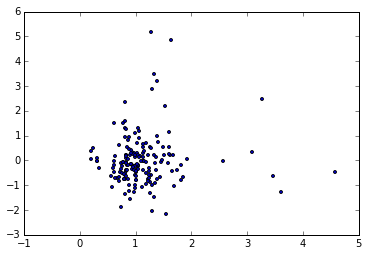

In [91]:
plt.scatter(df["change_scaled"],df[deviation_linear],s=8)

In [92]:
df.sort(columns=deviation_linear, axis=0, 
        ascending=True, inplace=False, kind='quicksort', 
        na_position='last').head(10)[["BOROUGH","pop_total","change_scaled",feature_cuisine,feature_cuisine_capita,"dx_linear_"+cuisine_type]]

,BOROUGH,pop_total,change_scaled,number_restaurants_mexican,number_restaurants_capita_mexican,dx_linear_mexican
11208,Brooklyn,98994,1.550436,4,0.310791,-2.152417
11355,Queens,87015,1.285904,3,0.227435,-2.026799
10023,Manhattan,33547,0.744715,10,0.875750,-1.861754
11235,Brooklyn,101200,0.905896,4,0.302699,-1.555669
10452,Bronx,79568,1.327713,2,0.204742,-1.480967
10019,Manhattan,28918,0.817392,18,1.528534,-1.337473
11101,Queens,14295,1.265900,3,0.696491,-1.316180
11221,Brooklyn,90903,3.603793,9,0.717763,-1.285236
11201,Brooklyn,48383,0.977910,14,1.245937,-1.277837
10457,Bronx,61476,0.878753,0,0.000000,-1.235843


In [93]:
df.sort(columns="change_scaled", axis=0, 
        ascending=False, inplace=False, kind='quicksort', 
        na_position='last').head(10)[["BOROUGH","pop_total","change_scaled",feature_cuisine,feature_cuisine_capita,"dx_linear_"+cuisine_type]]

,BOROUGH,pop_total,change_scaled,number_restaurants_mexican,number_restaurants_capita_mexican,dx_linear_mexican
10026,Manhattan,42285,4.579256,2,0.334799,-0.451135
11221,Brooklyn,90903,3.603793,9,0.717763,-1.285236
11233,Brooklyn,77775,3.467466,1,0.095480,-0.619474
11238,Brooklyn,79172,3.273500,28,2.512692,2.486513
10168,Manhattan,4946,3.082192,4,2.994729,0.336568
11433,Queens,18919,2.568493,2,0.724718,-0.016340
11413,Queens,29468,1.926370,0,0.000000,0.049129
10112,Manhattan,1031,1.849315,0,0.000000,-0.653067
11213,Brooklyn,51342,1.819961,1,0.126697,-0.796820
11212,Brooklyn,86890,1.806802,0,0.000000,-0.191329


In [94]:
print("R2_Linear = ",df["r2_linear_"+cuisine_type].unique()[0])
print("R2_RF = ",df["r2_rf_"+cuisine_type].unique()[0])
print("StdDev_Linear = ",df["stddev_linear_"+cuisine_type].unique()[0])
print("StdDev_RF = ",df["stddev_rf_"+cuisine_type].unique()[0])
for i in df.columns: print i

('R2_Linear = ', 0.54591519769999997)
('R2_RF = ', 0.86560391759999999)
('StdDev_Linear = ', 6.5629574230000003)
('StdDev_RF = ', 3.5704042107)
2001
2002
2004
2007
2010
2012
ALAND
ALAND_SQMI
AWATER
AWATER_SQMI
BOROUGH
FRAC_LAND
GEOID
INTPTLAT
INTPTLONG
LATMAX
LATMIN
LONGMAX
LONGMIN
STATE
STATE_ID
STATION
STATION_DISTANCE
USPS
average_rating_restaurants_arabian
average_rating_restaurants_brazilian
average_rating_restaurants_cafes
average_rating_restaurants_chinese
average_rating_restaurants_colombian
average_rating_restaurants_cuban
average_rating_restaurants_diners
average_rating_restaurants_ethiopian
average_rating_restaurants_french
average_rating_restaurants_greek
average_rating_restaurants_indpak
average_rating_restaurants_italian
average_rating_restaurants_japanese
average_rating_restaurants_korean
average_rating_restaurants_latin
average_rating_restaurants_mexican
average_rating_restaurants_mideastern
average_rating_restaurants_newamerican
average_rating_restaurants_peruvian
aver

In [95]:
df.head(5)

,2001,2002,2004,2007,2010,2012,ALAND,ALAND_SQMI,AWATER,AWATER_SQMI,...,unweighed_average_rating_restaurants_seafood,unweighed_average_rating_restaurants_soup,unweighed_average_rating_restaurants_spanish,unweighed_average_rating_restaurants_tradamerican,unweighed_average_rating_restaurants_turkish,unweighed_average_rating_restaurants_vegan,unweighed_average_rating_restaurants_vegetarian,zillow_house_index,zillow_house_median,change_scaled
10001,275,290,352,377,410,416,346238,0.133,0,0.000,...,3.333333,6.25,NaN,6.671429,NaN,8.250000,8.250000,0,0,0.932503
10002,634,312,436,476,600,625,2063151,0.797,1249217,0.482,...,10.583333,5.00,9.250000,22.375000,NaN,14.833333,8.000000,0,0,0.607688
10003,445,456,492,539,565,590,1097625,0.424,0,0.000,...,18.812500,11.50,7.833333,28.351190,4.0,17.166667,26.233333,0,0,0.817300
10007,84,85,106,110,117,134,312722,0.121,0,0.000,...,4.000000,NaN,NaN,3.500000,NaN,NaN,4.000000,0,0,0.983366
10009,166,186,209,213,242,281,1625274,0.627,1072262,0.414,...,7.000000,4.50,20.000000,15.157143,2.5,8.166667,15.250000,0,0,1.043489


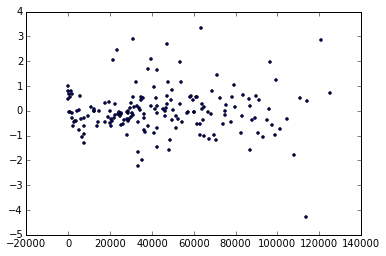

In [96]:
plt.scatter(df['pop_total'],df['dx_linear_all']-df['dx_linear_chinese'],s=6)

In [97]:
x = df['dx_linear_all']-df['dx_linear_chinese']
df2 = df.copy()

In [107]:
df['dx_relative'] = df['dx_linear_all']-df['dx_linear_chinese']

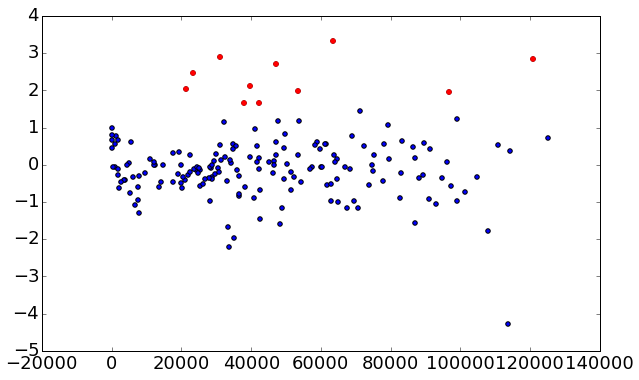

In [108]:
plt.scatter(df['pop_total'],df['dx_relative'])
plt.scatter(df.loc[df['dx_relative'] > 1.5,'pop_total'],df.loc[df['dx_relative'] > 1.5,'dx_relative'],color='red')

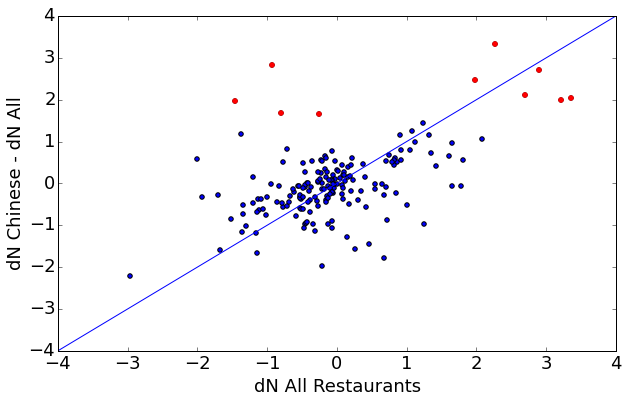

In [109]:
plt.scatter(df['dx_linear_all'],df['dx_relative'])
plt.scatter(df.loc[df2['dx_relative'] > 1.5,'dx_linear_all'],df.loc[df['dx_relative'] > 1.5,'dx_relative'],color='red')
plt.plot([-4,4],[-4,4])
plt.axis([-4,4,-4,4])
plt.xlabel("dN All Restaurants")
plt.ylabel("dN Chinese - dN All")

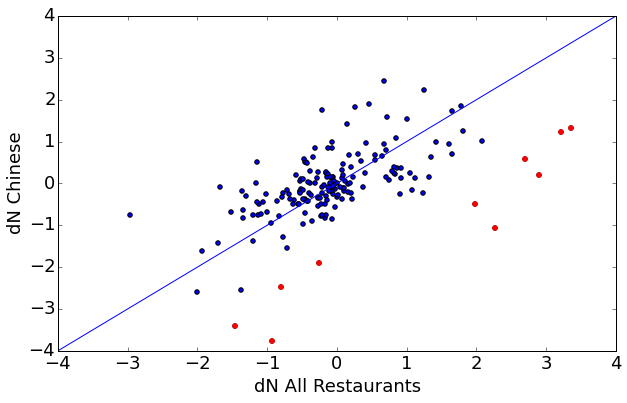

In [110]:
plt.scatter(df['dx_linear_all'],df['dx_linear_chinese'])
plt.scatter(df.loc[df2['dx_relative'] > 1.5,'dx_linear_all'],df.loc[df['dx_relative'] > 1.5,'dx_linear_chinese'],color='red')
plt.plot([-4,4],[-4,4])
plt.axis([-4,4,-4,4])
plt.xlabel("dN All Restaurants")
plt.ylabel("dN Chinese")

In [111]:
df.sort('dx_relative',ascending=False).head(10).index

Float64Index([10009.0, 10036.0, 11377.0, 10003.0, 10012.0, 10014.0, 10013.0, 10016.0, 11373.0, 11364.0], dtype='float64')

In [112]:
df.sort('dx_linear_chinese',ascending=True).head(10).index

Float64Index([11377.0, 11373.0, 11219.0, 11228.0, 11364.0, 11358.0, 11230.0, 11357.0, 10025.0, 10024.0], dtype='float64')

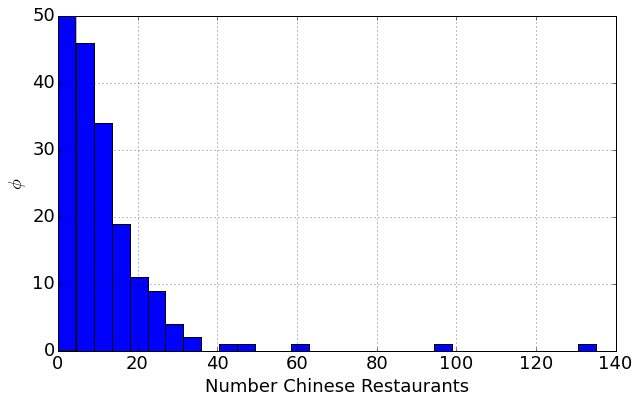

In [113]:
mpl.rcParams["figure.figsize"] = (10,6)
mpl.rcParams["font.size"] = 18
fig = plt.figure()
ax1 = fig.add_subplot(111)
df['number_restaurants_chinese'].hist(bins=30,ax=ax1)
ax1.set_xlabel("Number Chinese Restaurants")
ax1.set_ylabel(r"$\phi$")
plt.savefig('/Users/deneb/insight/demos/week4/histogram_chinese.jpg', bbox_inches='tight')

In [ ]:
mpl.rcParams["figure.figsize"] = (10,6)
mpl.rcParams["font.size"] = 18
fig = plt.figure()
ax1 = fig.add_subplot(111)
df['dx_linear_chinese'].hist(bins=30,ax=ax1,color="orange")
ax1.set_xlabel("Deviation from Model (Chinese Cuisine)")
ax1.set_ylabel(r"$\phi$")
#plt.savefig('/Users/deneb/insight/demos/week4/histogram_chinese.jpg', bbox_inches='tight')
plt.savefig('/Users/deneb/insight/demos/week4/histogram_dx_chinese_scaled.jpg', bbox_inches='tight')

In [ ]:
mpl.rcParams["figure.figsize"] = (10,6)
mpl.rcParams["font.size"] = 18
fig = plt.figure()
ax1 = fig.add_subplot(111)
df['dx_linear_raw_chinese'].hist(bins=30,ax=ax1,color="orange")
ax1.set_xlabel("Deviation from Model (Chinese Cuisine)")
ax1.set_ylabel(r"$\phi$")
plt.savefig('/Users/deneb/insight/demos/week4/histogram_dx_chinese_unscaled.jpg', bbox_inches='tight')

In [114]:
df.sort('dx_linear_chinese',ascending=True).head(10).index

Float64Index([11377.0, 11373.0, 11219.0, 11228.0, 11364.0, 11358.0, 11230.0, 11357.0, 10025.0, 10024.0], dtype='float64')

In [123]:
df['composite_score_chinese'] = df['change_scaled'] * df['dx_linear_chinese']

In [127]:
df.sort("composite_score_chinese",inplace=False)[['composite_score_chinese','change_scaled','dx_linear_chinese']]

,composite_score_chinese,change_scaled,dx_linear_chinese
11373,-3.680064,1.077427,-3.415604
11377,-3.187316,0.843813,-3.777277
11219,-2.903130,1.122798,-2.585620
11228,-2.129509,0.834760,-2.551043
11364,-1.893928,0.766383,-2.471255
11358,-1.888951,0.988114,-1.911672
10025,-1.479321,1.041568,-1.420282
11233,-1.447825,3.467466,-0.417546
11357,-1.239701,0.799087,-1.551397
10026,-1.146491,4.579256,-0.250366
